In [147]:
! pip install requests bs4 selenium lxml html5lib tqdm psutil pandas pillow shortuuid

You should consider upgrading via the '/run/media/abdul/Asus/ICU/autoMarketplace/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import requests

In [1]:
import bs4
import lxml
from bs4 import BeautifulSoup
from selenium import webdriver

from tqdm import tqdm
import random
import time
from datetime import datetime

import psutil
import linecache
import sys
from pprint import pprint

import requests
from PIL import Image
import os
import json

chrome_options = webdriver.ChromeOptions()
# myProxy = '175.106.17.62:47641'
# chrome_options.add_argument('--proxy-server=%s' % myProxy) 
# chrome_options.add_argument('--headless') #for pop up windows
chrome_options.add_argument("user-data-dir=cache/selenium")
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-setuid-sandbox')

chrome_options.add_experimental_option("prefs", {
  "download.default_directory": r"/run/media/abdul/Asus/ICU/autoMarketplace",
  "download.prompt_for_download": False,
  "download.directory_upgrade": True,
  "safebrowsing.enabled": True
})

In [114]:
 os.getcwd()

'/run/media/abdul/Asus/ICU/autoMarketplace'

In [69]:
driver = webdriver.Chrome(options=chrome_options)

In [110]:
PATH_DATA = '/run/media/abdul/Asus/ICU/autoMarketplace/output/tokopedia/tokopedia_10-02-2021.xlsx'

def bulk_upload(options ,path_data):
    driver = webdriver.Chrome(options=options)
    time.sleep(1)
    driver.get('https://seller.tokopedia.com/bulk/add')
    time.sleep(5)
    
    element = driver.find_element_by_xpath('//*[@id="BulkUploadArea"]/div[3]/input')
    element.send_keys(path_data)
    time.sleep(5)
    
    elemntupload = driver.find_element_by_xpath('//*[@id="BulkUploadArea"]/div[3]/div[3]/button[2]')
    elemntupload.click()
    time.sleep(5)
    
    alt_status = ['Fail Icon', 'Warning Icon', 'Success Icon']
    progress_bar_cache = '0%'

    while True:
        soup = bs4.BeautifulSoup(driver.page_source,'lxml')
        upload_field = soup.find('section',{'id':'BulkUploadArea'})
        try:
            progress_bar = soup.find('div', {'id':'progressbar_bulk'}).text
            if progress_bar_cache != progress_bar:
                print('Upload Progress %s' % (progress_bar))
                progress_bar_cache = progress_bar
            continue

        except:
            time.sleep(1)
            soup = bs4.BeautifulSoup(driver.page_source,'lxml')
            upload_field = soup.find('section',{'id':'BulkUploadArea'})
            #print(upload_field)
            
            alt_img = upload_field.find('img').get('alt')
            
            if alt_img in alt_status:
                message = upload_field.find('div', {'class':'css-1s0chwd'}).text
                suggestion = upload_field.find('div', {'class':'css-1fxly6l'}).text
                print(message)
                print(suggestion)
                time.sleep(5)
                download_element = driver.find_element_by_xpath('//*[@id="BulkUploadArea"]/div[3]/div[3]/button[2]')
                download_element.click()
                time.sleep(5)
                driver.close()
                break 
            else:
                continue

In [112]:
bulk_upload(options=chrome_options ,path_data=PATH_DATA)

Upload Progress 42%
Upload Progress 80%
Upload Progress 100%
 Oops, kamu gagal menambahkan SKU
Download file untuk perbaiki produk yang gagal atau upload lagi.
masukin apa kek0
masukin apa kek0


In [70]:
driver.get('https://seller.tokopedia.com/bulk/add')

In [71]:
element = driver.find_element_by_xpath('//*[@id="BulkUploadArea"]/div[3]/input')

In [72]:
element.send_keys("/run/media/abdul/Asus/ICU/autoMarketplace/output/tokopedia/tokopedia_10-02-2021.xlsx")

In [73]:
elemntupload = driver.find_element_by_xpath('//*[@id="BulkUploadArea"]/div[3]/div[3]/button[2]')
elemntupload.click()

In [148]:
driver = scroll_page(driver)

Scrolling.... 1x
Done Scrolling


In [ ]:
div id:progressbar_bulk

In [43]:
soup = bs4.BeautifulSoup(driver.page_source,'lxml')

In [56]:
upload_field = soup.find('section',{'id':'BulkUploadArea'})
upload_field

<section class="css-mr6jyy-unf-card eyk31ek0" data-testid="crdBulkAddCard2" id="BulkUploadArea"><div class="css-k008qs"><div class="css-1qyocv2">2</div> <div class="css-1x5cgei">Upload file Excel</div></div><div class="css-gmysuq">Pilih atau letakkan file Excel(.xlsx) kamu di sini. Maks. 300 produk dalam satu file.</div><div class="css-1oyugy6" tabindex="0"><input accept="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet, application/vnd.ms-excel" autocomplete="off" style="display: none;" tabindex="-1" type="file"/><img alt="Warning Icon" height="86px" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/icarus/kratos/ce56133b.gif"/><div class="css-1s0chwd">Kamu hanya menambahkan [21/24] SKU</div><div class="css-1fxly6l">Download file untuk perbaiki produk yang gagal atau upload lagi.</div><div><button class="css-1xvynbo-unf-btn e1ggruw00"><span>Upload Lagi</span></button><button class="css-4xfggq-unf-btn e1ggruw00" style="width: 140px;"><span>Download File</span>

In [ ]:
alt
Fail Icon
Warning Icon
Success Icon

In [67]:
soup = bs4.BeautifulSoup(driver.page_source,'lxml')
upload_field = soup.find('section',{'id':'BulkUploadArea'})
progress_bar = soup.find('div', {'id':'progressbar_bulk'}).text


AttributeError: 'NoneType' object has no attribute 'text'

In [66]:
progress_bar

'37%'

In [75]:
alt_status = ['Fail Icon', 'Warning Icon', 'Success Icon']
progress_bar_cache = '0%'

while True:
    soup = bs4.BeautifulSoup(driver.page_source,'lxml')
    upload_field = soup.find('section',{'id':'BulkUploadArea'})
    try:
        alt_img = upload_field.find('img').get('alt')
        if alt_img in alt_status:
            message = upload_field.find('div', {'class':'css-1s0chwd'}).text
            suggestion = upload_field.find('div', {'class':'css-1fxly6l'}).text
            print(message)
            print(suggestion)
            break
        else:
            continue
            
    except:
        progress_bar = soup.find('div', {'id':'progressbar_bulk'}).text
        if progress_bar_cache != progress_bar:
            print('Upload Progress %s' % (progress_bar))
            progress_bar_cache = progress_bar
        continue

 Oops, kamu gagal menambahkan SKU
Download file untuk perbaiki produk yang gagal atau upload lagi.


AttributeError: 'NoneType' object has no attribute 'text'

In [19]:
image_list_raw = soup.findAll('div', {'data-testid':'PDPImageThumbnail'})
image_list_link = [img.find('img').get('src') for img in image_list_raw]
image_list

['https://ecs7.tokopedia.net/img/cache/100-square/product-1/2020/9/10/83272861/83272861_6e0f0a43-f9c0-4794-aa96-63275210f865_1080_1080.webp',
 'https://ecs7.tokopedia.net/img/cache/100-square/product-1/2020/7/8/83272861/83272861_71b82983-b5d8-4cf2-98e2-b9dc443ac002_500_500.webp',
 'https://ecs7.tokopedia.net/img/cache/100-square/product-1/2020/7/8/83272861/83272861_79497555-efd1-45ae-86e6-44b9824152b0_1000_1000.webp',
 'https://ecs7.tokopedia.net/img/cache/100-square/product-1/2020/9/10/83272861/83272861_2d61fcea-70c0-4e13-8dc1-8e88fa75d362_800_800.webp',
 'https://ecs7.tokopedia.net/img/cache/100-square/product-1/2020/9/10/83272861/83272861_c92d3bf3-1262-432b-96ce-be351dcc28aa_500_500.webp']

In [4]:
def prepocessing_number(txt):
    txt = str(txt)
    new_txt = txt.replace('.','').replace('Rp','').replace('(','').replace(')','')
    new_txt = new_txt.replace(',','.')
    if 'rb' in new_txt:
        new_txt = new_txt.replace('rb','')
        float_number = float(new_txt) * 1000
    else:
        float_number = float(new_txt)
    return float_number

def parser_header(soup, root='./image/'):
    dict_product_content = {
        'product_name' : None,
        'n_stock':0,
        'n_terjual': 0,
        'n_stars': 0,
        'n_reviews':0,
        'n_discuss':0,
        'product_price':0,
        'list_img_link':None,
        'list_img':None
    }
    try:
        stock_raw = soup.find('div', {'data-testid':'quantityOrder'}).text.split(' ')[1]
        stock = prepocessing_number(stock_raw)
        dict_product_content['n_stock'] = stock
        
        image_list_raw = soup.findAll('div', {'data-testid':'PDPImageThumbnail'})
        image_list_link = [img.find('img').get('src') for img in image_list_raw]
        dict_product_content['list_img_link'] = image_list_link
        
        list_img = []
        for link_img in image_list_link:
            filename_img = download_img(link=link_img ,root=root,resolusi=500)
            list_img.append(filename_img)
        dict_product_content['list_img'] = list_img
    
        header_raw = soup.find('div', {'id':'pdp_comp-product_content'})
        product_name = header_raw.find('h1',{'data-testid':'lblPDPDetailProductName'}).text
        dict_product_content['product_name'] = product_name
        # product_name

        items_raw = header_raw.find('div', {'class':'items'})
        # items_raw
        n_terjual = items_raw.find('div', {'data-testid':'lblPDPDetailProductSoldCounter'}).text.replace('Terjual ','').replace('.','')
        dict_product_content['n_terjual'] = prepocessing_number(n_terjual)
        # n_terjual
/run/media/abdul/Asus/ICU/autoMarketplace/utils.py
        n_stars = float(items_raw.find('span', {'data-testid':'lblPDPDetailProductRatingNumber'}).text)
        dict_product_content['n_stars'] = n_stars
        # n_stars

        n_reviews = items_raw.find('span', {'data-testid':'lblPDPDetailProductRatingCounter'}).text.replace('.','').replace('(','').replace(')','').replace(' ulasan','')
        dict_product_content['n_reviews'] = prepocessing_number(n_reviews)
        # n_reviews

        n_discuss = int(items_raw.find('div', {'data-testid':'lblPDPDetailProductDiscussionNumber'}).text.replace('.','').replace('(','').replace(')','').replace('Diskusi',''))
        dict_product_content['n_discuss'] = prepocessing_number(n_discuss)
        # n_discuss

        product_price = int(header_raw.find('div', {'data-testid':'lblPDPDetailProductPrice'}).text.replace('.','').replace('Rp',''))
        dict_product_content['product_price'] = prepocessing_number(product_price)
        # product_price
    
    except:
        PrintException()
        pass
    
    return dict_product_content

def download_img(link, root='./image/',resolusi=100):
    res_str = '{}-square'.format(resolusi)
    link = link.replace('100-square',res_str)
    list_link = link.split('/')
    name_file = list_link[-1]
    response = requests.get(link)
    #time.sleep(1)
    filename = root+name_file
    file = open(filename, "wb")

    file.write(response.content)

    file.close()
    
    im = Image.open(filename).convert('RGB')
    filename_png = filename.replace('webp', 'png')
    im.save(filename_png, 'png')
    os.remove(filename)
    
    print("Succes download %s" %(filename))
    
    return filename_png

def parser_detail_product(soup):
    dict_detail = {
        'Kondisi': None,
        'Berat' : None,
        'Kategori' : None,
        'Etalase' : None,
        'description' : None
    }
    
    try:
        detail_product_raw = soup.find('div',{'id':'pdp_comp-product_detail'})
        info_product_raw = detail_product_raw.find('ul',{'data-testid':'lblPDPInfoProduk'})
        list_info_raw = info_product_raw.findAll('li')
        info_dict = {}
        for info_raw in list_info_raw:
            info_txt = info_raw.text
            info_list = info_txt.split(': ')
            info_dict[info_list[0]]=info_list[1]
        dict_detail.update(info_dict)
        dict_detail['Berat'] = float(dict_detail['Berat'].replace('.','').replace(' Gram',''))   

        description_raw = detail_product_raw.find('div',{'data-testid':'lblPDPDescriptionProduk'})
        description = str(description_raw).replace('<div data-testid="lblPDPDescriptionProduk">','').replace('</div>','').replace('<br/>','\n')
        dict_detail['description']=description
        #description
    except:
        PrintException()
        pass
    
    return dict_detail

def PrintException():
    exc_type, exc_obj, tb = sys.exc_info()
    f = tb.tb_frame
    lineno = tb.tb_lineno
    filename = f.f_code.co_filename
    linecache.checkcache(filename)
    line = linecache.getline(filename, lineno, f.f_globals)
    print ('EXCEPTION IN ({}, LINE {} "{}"): {}'.format(filename, lineno, line.strip(), exc_obj))


def scroll_page(driver):
    last_height = driver.execute_script("return document.body.scrollHeight")


    i=1

    while True:
        print('Scrolling.... {}x'.format(i))

        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # Wait to load page
        rand = random.randint(5,7)
        time.sleep(rand)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            print('Done Scrolling')
            break
        last_height = new_height

        #print('\n')
        i=i+1
    
    return driver


def parser_product(soup):
    master_product = soup.findAll('div', {'class':'css-wlcnlb','data-testid':'master-product-card'} ,recursive=True)
    
    if len(master_product)==0:
        return 0
    
    all_product = []
    
    report = {
        'succes':0,
        'failed':0
    }
    
    for product in tqdm(master_product, desc='parsing_product'):
        data_product = {
                        'link':None,
        
                        'img_link':None,
                        'img_alt':None,

                        'product_name':None,
                        'product_price':0,

                        'n_stars' :0,
                        'n_reviews' :0

                        }
        
        try:
        
            link = product.find('a').get('href')
            data_product['link'] = link

            img_detail = product.find('div', {'data-testid':'imgProduct'})
            #rint(img_detail)
            img_link = img_detail.find('img').get('src')
            data_product['img_link'] = img_link
            img_alt = img_detail.find('img').get('alt')
            data_product['img_alt'] = img_alt

            product_name = product.find('div',{'data-testid':'linkProductName'}).text
            data_product['product_name'] = product_name
            product_price = product.find('div',{'data-testid':'linkProductPrice'}).text
            data_product['product_price'] = prepocessing_number(product_price)

            rating = product.find('div',{'data-testid':'linkProductRating'})
            stars = rating.findAll('img')
            n_stars = 0
            for star in stars:
                if star.get('alt') == 'star':
                    n_stars= n_stars +1
                else:
                    n_stars= n_stars +0.5
            data_product['n_stars'] = n_stars
            n_reviews = product.find('span', {'data-testid':'spanReview'}).text
            data_product['n_reviews'] = prepocessing_number(n_reviews)
            
            #pprint(data_product)
            all_product.append(data_product)
            
            report['succes'] = report['succes'] + 1
            
        except:
            PrintException()
            report['failed'] = report['failed'] + 1
            continue
        
    print('Report parsing_product:\n\t succes = {}\n\t failed = {}'.format(report['succes'], report['failed']))
    all_product = list({v['link']:v for v in all_product}.values())
    print('Deleting Duplicate ....')
    
    
    print('before = {}\n after = {}\n\t'.format(report['succes'], len(all_product)))
    return all_product

def scrape_terlaris(options = chrome_options, root='./image/'):
    print('Getting Data Product Best Seller...\n')
    driver = webdriver.Chrome(options=options)
    time.sleep(1)
    
    driver.get('https://www.tokopedia.com/discovery/produk-terlaris')
    time.sleep(2)
    driver = scroll_page(driver)
    time.sleep(3)
    
    soup = bs4.BeautifulSoup(driver.page_source,'lxml')
    
    result = parser_product(soup)
    
    results = []
    for res in tqdm(result, desc = 'detail scrapping'):
        link = res['link']
        driver.get(link)
        time.sleep(2)
        
        soup = bs4.BeautifulSoup(driver.page_source,'lxml')
        header_product = parser_header(soup ,root=root)
        detail_product = parser_detail_product(soup)
        res.update(header_product)
        res.update(detail_product)
        
        results.append(res)
        
    
    driver.close()
    
    return results

In [5]:
hasil = scrape_terlaris()

Getting Data Product Best Seller...

Scrolling.... 1x
Scrolling.... 2x
Scrolling.... 3x
Done Scrolling


detail scrapping:   0%|          | 0/38 [00:00<?, ?it/s]

Report parsing_product:
	 succes = 38
	 failed = 0
Deleting Duplicate ....
before = 38
 after = 38
	
Succes download ./image/1006097199_04d510f1-b6e7-4da6-aaa5-cc8258ff0b7b_1039_1039.jpg.webp
Succes download ./image/1006097199_b8c8237f-9d99-4d69-b7cd-73c69e9113f9_1080_1080.jpg.webp


detail scrapping:   3%|▎         | 1/38 [00:05<03:26,  5.58s/it]

Succes download ./image/1006097199_ea7a0b90-7211-4954-ad7d-12a1553e2b40_904_904.jpg.webp
Succes download ./image/5deeaa83-14b6-4a28-9488-06d3f4049c70.jpg.webp
Succes download ./image/40c0b8a1-619a-43ab-aa97-ec651693859d.jpg.webp
Succes download ./image/ac6fdcd7-8616-4f16-95a8-b55f332fa661.jpg.webp
Succes download ./image/070eea19-2e95-4073-82e7-36b499d821a1.jpg.webp


detail scrapping:   5%|▌         | 2/38 [00:12<03:39,  6.10s/it]

Succes download ./image/0536e999-99ba-419c-bacf-02563bea396e.jpg.webp
Succes download ./image/16980914_45c02df9-c53b-450d-9695-35328438afe6_2048_2047.webp
Succes download ./image/16980914_97f67cb0-5163-4028-9a87-8e23f282cc3a_700_700.webp
Succes download ./image/16980914_c5386f41-5bf9-4468-941a-d6db99b48cea_2048_2047.webp
Succes download ./image/16980914_45f1bdfd-028e-46cf-92d1-fa10a09aa20b_700_700.webp


detail scrapping:   8%|▊         | 3/38 [00:27<06:06, 10.47s/it]

Succes download ./image/2ac4a166-2f9a-4852-ab2d-529453da2e53.jpg.webp


detail scrapping:  11%|█         | 4/38 [00:31<04:28,  7.89s/it]

Succes download ./image/77854981_70969b0c-effc-4549-9127-d71fdf86c30a.jpg.webp
Succes download ./image/ce40e8df-a6fa-41f7-babc-e30f782a20ab.jpg.webp
Succes download ./image/d834c0cb-eb93-4133-b89d-e1d8de73f0d4.jpg.webp
Succes download ./image/0e44f3ca-7007-4a5a-8383-65ecedcb3556.jpg.webp
Succes download ./image/3f9bb9f7-2bcb-422e-aa43-0dcb7b832f0e.jpg.webp


detail scrapping:  13%|█▎        | 5/38 [00:36<03:46,  6.87s/it]

Succes download ./image/2df2e271-1444-4ee2-b943-b99744f18a5c.jpg.webp
Succes download ./image/default.jpg
Succes download ./image/88901272_13f36b6a-98d8-4c34-a5c3-be52bd9f8bbc_1280_1280.webp
Succes download ./image/88901272_6d37c3d0-7de4-4643-bde0-b1d1c5421674_1280_1280.webp
Succes download ./image/88901272_4a579505-ee44-4c2b-b784-16c756293821_1280_1280.webp
Succes download ./image/88901272_4e37ef7b-09df-46a9-84a7-679701f9f00c_1280_1280.webp


detail scrapping:  16%|█▌        | 6/38 [00:42<03:29,  6.54s/it]

Succes download ./image/88901272_a2f3c6e5-ef9e-434d-99b9-09fe6f2ac41f_1280_1280.webp
Succes download ./image/a4096c95-03a5-44d8-83ab-bc2bcf11bf65.jpg.webp


detail scrapping:  18%|█▊        | 7/38 [00:45<02:50,  5.51s/it]

Succes download ./image/3896c8b5-5d00-441a-8290-9e03984f0623.jpg.webp
Succes download ./image/default.jpg
Succes download ./image/default.jpg
Succes download ./image/bb3db8a1-cd4b-419b-b732-32bb4b5a43c9.jpg.webp
Succes download ./image/f9de8fb8-81e0-498a-bda0-58200ec3b12a.jpg.webp
Succes download ./image/bd6a7362-2c5d-49ee-82a1-cf26df25ab1b.jpg.webp


detail scrapping:  21%|██        | 8/38 [00:50<02:37,  5.25s/it]

Succes download ./image/e0a5cd4d-debb-40c2-bd2c-7d3a37bf87ca.jpg.webp
Succes download ./image/48690432_3c014130-7764-4acd-ac6e-b639d91030ef_640_640.webp
Succes download ./image/48690432_2e7649a4-e06a-4680-af51-6061af8e3c74_640_640.webp
Succes download ./image/48690432_5de11090-a7fe-4f51-9a6b-11fd1e26e0dc_640_640.webp
Succes download ./image/48690432_b1ee2d66-2e0f-43b6-abf8-84aa67e9f966_640_640.webp


detail scrapping:  24%|██▎       | 9/38 [00:56<02:32,  5.27s/it]

Succes download ./image/48690432_adc19409-e597-4853-8d50-8af0c6732048_640_640.webp
Succes download ./image/ee6da73d-56e4-41bc-94bd-4d40e7dd5a33.jpg.webp
Succes download ./image/e8545871-99ca-4108-88db-85561e3f6305.jpg.webp


detail scrapping:  26%|██▋       | 10/38 [01:00<02:23,  5.11s/it]

Succes download ./image/4e1f80ec-ecdd-4a2e-8c0c-155cdf0b4893.jpg.webp
Succes download ./image/17211033_a30b5d37-0bf9-41da-8273-b32731d2553b_1180_1180.webp
Succes download ./image/17211033_85250ff9-02f6-49d6-93a9-2438ef616cb2_1200_1200.webp
Succes download ./image/4d2dd30a-8d88-4293-a888-35d95ebd0c8a.jpg.webp
Succes download ./image/5d7b7b13-ecc4-4aff-a870-75c46c0358f4.jpg.webp
Succes download ./image/2a9f2c16-2f89-473c-b137-a98a84bcac76.jpg.webp


detail scrapping:  29%|██▉       | 11/38 [01:07<02:31,  5.61s/it]

Succes download ./image/default.jpg
Succes download ./image/291926f0-4286-4574-924f-8ab3f2ccf175.jpg.webp
Succes download ./image/1a4fb8b8-9c15-4bba-8b39-6069d7c428c6.jpg.webp


detail scrapping:  32%|███▏      | 12/38 [01:11<02:10,  5.03s/it]

Succes download ./image/a960f972-3253-470e-9528-29930da93338.jpg.webp


detail scrapping:  34%|███▍      | 13/38 [01:14<01:55,  4.64s/it]

Succes download ./image/e70df139-c133-4796-9335-e57d5f2de84b.jpg.webp


detail scrapping:  37%|███▋      | 14/38 [01:18<01:40,  4.21s/it]

Succes download ./image/43552572_fdb76ebb-b155-4516-aba7-b8192f2e8535_1000_1000.webp
Succes download ./image/100463072_d3f6d144-e964-47ce-9e1c-985c5db53805_1280_1280.webp
Succes download ./image/100463072_2480e613-648c-4681-b37e-81f6ff3e1772_1280_1280.webp
Succes download ./image/100463072_97987979-f3d7-4cc3-86a2-56dee2a6d32c_1280_1280.webp


detail scrapping:  39%|███▉      | 15/38 [01:22<01:39,  4.33s/it]

Succes download ./image/100463072_fdecf4cc-746c-41f6-abd2-1162fea940a7_1280_1280.webp
Succes download ./image/50281424_c7cc3975-be51-491b-ae4b-41ec8728f9b0.jpg.webp
Succes download ./image/9cf7f335-6b0f-497a-aa04-d6f6a900518e.jpg.webp


detail scrapping:  42%|████▏     | 16/38 [01:26<01:33,  4.24s/it]

Succes download ./image/3dc99134-881c-4f90-8bee-f4308b4b4767.jpg.webp
Succes download ./image/65580410_b738827d-1d55-4bb8-ba08-55bda5d9126d.jpg.webp
Succes download ./image/b0941c30-e99e-425b-b179-d5f453dd3a65.jpg.webp
Succes download ./image/0dd763c6-ab4b-4d91-a735-c4af7738a413.jpg.webp
Succes download ./image/1f8ea9b3-f7ac-43d2-81d1-a4be63142bae.jpg.webp


detail scrapping:  45%|████▍     | 17/38 [01:31<01:30,  4.30s/it]

Succes download ./image/59ff0ea8-f59b-4461-be94-12a5b791f21d.jpg.webp
Succes download ./image/default.jpg
Succes download ./image/83272861_6e0f0a43-f9c0-4794-aa96-63275210f865_1080_1080.webp
Succes download ./image/83272861_71b82983-b5d8-4cf2-98e2-b9dc443ac002_500_500.webp
Succes download ./image/83272861_79497555-efd1-45ae-86e6-44b9824152b0_1000_1000.webp


detail scrapping:  47%|████▋     | 18/38 [01:35<01:28,  4.42s/it]

Succes download ./image/83272861_2d61fcea-70c0-4e13-8dc1-8e88fa75d362_800_800.webp
Succes download ./image/83272861_c92d3bf3-1262-432b-96ce-be351dcc28aa_500_500.webp
Succes download ./image/5b88ee0f-51b0-41c7-96d7-b5183f1073c5.jpg.webp
Succes download ./image/822ccdc0-d09f-4937-ad5c-1b388a581586.jpg.webp
Succes download ./image/25b7f03a-8217-438e-b22a-2f5e7b7ef1b7.jpg.webp
Succes download ./image/572b1d80-9d9f-4757-80c0-3e129d77cd9d.jpg.webp


detail scrapping:  50%|█████     | 19/38 [01:39<01:19,  4.20s/it]

Succes download ./image/e0fef891-8b33-454d-8246-b8b8ada7eb1f.jpg.webp


detail scrapping:  53%|█████▎    | 20/38 [01:43<01:11,  3.96s/it]

Succes download ./image/6ddfbf5d-ac77-4c31-97b0-7a45433f9337.jpg.webp


detail scrapping:  55%|█████▌    | 21/38 [01:46<01:04,  3.81s/it]

EXCEPTION IN (<ipython-input-4-4bcbc30b37ec>, LINE 25 "stock_raw = soup.find('div', {'data-testid':'quantityOrder'}).text.split(' ')[1]"): 'NoneType' object has no attribute 'text'
Succes download ./image/44b7dc44-d74e-4e33-baba-1018686b33d7.png.webp
Succes download ./image/3261e669-3fa1-4de7-b00e-d74755c0b47c.jpg.webp
Succes download ./image/5ffe6ec6-5904-488b-ad45-41056c166dd2.jpg.webp
Succes download ./image/1d2ed1b6-6435-4a11-bc03-e1e56c33f22d.png.webp
Succes download ./image/df708cab-a847-49e6-b7a3-b17b729166f1.png.webp


detail scrapping:  58%|█████▊    | 22/38 [01:52<01:13,  4.58s/it]

Succes download ./image/default.jpg
Succes download ./image/a4096c95-03a5-44d8-83ab-bc2bcf11bf65.jpg.webp
Succes download ./image/3896c8b5-5d00-441a-8290-9e03984f0623.jpg.webp
Succes download ./image/default.jpg


detail scrapping:  61%|██████    | 23/38 [01:58<01:13,  4.88s/it]

Succes download ./image/default.jpg
Succes download ./image/3446525_a6a29362-12b4-425b-92ea-9bbcd7ec245d_700_700.webp
Succes download ./image/3446525_8c075998-874d-4e48-9092-a0070ebb0b49_700_700.webp


detail scrapping:  63%|██████▎   | 24/38 [02:11<01:42,  7.31s/it]

Succes download ./image/3446525_1f0d04f1-c022-45e6-a6cc-98d37c13408e_700_700.webp
Succes download ./image/bf0bbd72-631d-440d-8db7-bac1b5f50269.jpg.webp
Succes download ./image/0cb2c285-33d5-49f8-85f9-53a1bfbf8fab.jpg.webp
Succes download ./image/adc754b6-7828-4c08-abcd-6aa758529d2c.jpg.webp


detail scrapping:  66%|██████▌   | 25/38 [02:15<01:21,  6.29s/it]

Succes download ./image/aa05c60f-d537-4591-8c4d-70b4c87f2a8e.jpg.webp
Succes download ./image/6b29632f-d025-4edc-a9a1-304e607e91b4.jpg.webp
Succes download ./image/07e02197-5e2f-41e8-9776-39eafa4552aa.jpg.webp
Succes download ./image/5363511_484138f6-57c2-4ac4-868b-c7111772f88a_706_706.webp
Succes download ./image/5363511_59144983-f382-4b34-a7b2-1cd6a43b6dd5_1019_1019.webp


detail scrapping:  68%|██████▊   | 26/38 [02:19<01:07,  5.60s/it]

Succes download ./image/4e16b531-747a-4896-92a1-91ddc399e20b.jpg.webp
Succes download ./image/1250241_ec02c4e0-32ba-4496-87a8-2d214d790c54.jpeg.webp
Succes download ./image/1250241_d6ae4aa2-d244-4acb-b982-15a2ffb28594.jpeg.webp
Succes download ./image/1250241_a5e2146b-d69a-4b06-8461-02192a247059.jpeg.webp


detail scrapping:  71%|███████   | 27/38 [02:24<00:58,  5.33s/it]

Succes download ./image/1250241_2a6e5b2b-046c-459b-89cd-885c40343122.jpeg.webp
Succes download ./image/1250241_f5502315-95c9-49c7-b283-fa1533181370.jpeg.webp


detail scrapping:  74%|███████▎  | 28/38 [02:28<00:50,  5.07s/it]

Succes download ./image/65580410_56d361ba-f635-461d-bb68-014a26666312.jpg.webp
EXCEPTION IN (<ipython-input-4-4bcbc30b37ec>, LINE 58 "n_discuss = int(items_raw.find('div', {'data-testid':'lblPDPDetailProductDiscussionNumber'}).text.replace('.','').replace('(','').replace(')','').replace('Diskusi',''))"): 'NoneType' object has no attribute 'text'
Succes download ./image/30969591_ff6c6926-8a18-47ae-9c44-4865545ee2ea_1512_1512.webp
Succes download ./image/30969591_032f2425-af10-4b8c-abb4-d554e7edcd08_1512_1512.webp
Succes download ./image/30969591_10e9a3d7-fa3c-4302-957a-2dc47c63a710_1512_1512.webp
Succes download ./image/30969591_3c47609d-f031-4c5b-8642-2cccd51da931_1512_1512.webp


detail scrapping:  76%|███████▋  | 29/38 [02:33<00:45,  5.03s/it]

Succes download ./image/30969591_51ad665c-4bda-49a4-93dc-890f5d840baa_1512_1512.webp
EXCEPTION IN (<ipython-input-4-4bcbc30b37ec>, LINE 46 "n_terjual = items_raw.find('div', {'data-testid':'lblPDPDetailProductSoldCounter'}).text.replace('Terjual ','').replace('.','')"): 'NoneType' object has no attribute 'find'
Succes download ./image/65580410_4f220376-0daa-49e2-8e42-e22105a88b53.jpg.webp
Succes download ./image/68093424_e0ce550a-8b9e-4f21-9f89-2d54089e8e8f_640_640.webp
Succes download ./image/68093424_09daf668-99f1-407a-898e-25aeb473029e_640_640.webp
Succes download ./image/68093424_4972084b-d5fb-43b9-86c2-8ef01f2b2e7f_640_640.webp


detail scrapping:  79%|███████▉  | 30/38 [02:38<00:40,  5.06s/it]

Succes download ./image/68093424_1cbf7980-feb3-4454-994f-812c0333c4e7_640_640.webp
Succes download ./image/48690432_3c014130-7764-4acd-ac6e-b639d91030ef_640_640.webp
Succes download ./image/48690432_2e7649a4-e06a-4680-af51-6061af8e3c74_640_640.webp
Succes download ./image/48690432_5de11090-a7fe-4f51-9a6b-11fd1e26e0dc_640_640.webp


detail scrapping:  82%|████████▏ | 31/38 [02:42<00:33,  4.83s/it]

Succes download ./image/48690432_b1ee2d66-2e0f-43b6-abf8-84aa67e9f966_640_640.webp
Succes download ./image/48690432_adc19409-e597-4853-8d50-8af0c6732048_640_640.webp
Succes download ./image/88901272_13f36b6a-98d8-4c34-a5c3-be52bd9f8bbc_1280_1280.webp
Succes download ./image/88901272_6d37c3d0-7de4-4643-bde0-b1d1c5421674_1280_1280.webp
Succes download ./image/88901272_4a579505-ee44-4c2b-b784-16c756293821_1280_1280.webp
Succes download ./image/88901272_4e37ef7b-09df-46a9-84a7-679701f9f00c_1280_1280.webp


detail scrapping:  84%|████████▍ | 32/38 [02:49<00:32,  5.37s/it]

Succes download ./image/88901272_a2f3c6e5-ef9e-434d-99b9-09fe6f2ac41f_1280_1280.webp


detail scrapping:  87%|████████▋ | 33/38 [02:53<00:24,  4.85s/it]

EXCEPTION IN (<ipython-input-4-4bcbc30b37ec>, LINE 25 "stock_raw = soup.find('div', {'data-testid':'quantityOrder'}).text.split(' ')[1]"): 'NoneType' object has no attribute 'text'
Succes download ./image/ee6da73d-56e4-41bc-94bd-4d40e7dd5a33.jpg.webp
Succes download ./image/e8545871-99ca-4108-88db-85561e3f6305.jpg.webp


detail scrapping:  89%|████████▉ | 34/38 [02:57<00:18,  4.56s/it]

Succes download ./image/4e1f80ec-ecdd-4a2e-8c0c-155cdf0b4893.jpg.webp
Succes download ./image/291926f0-4286-4574-924f-8ab3f2ccf175.jpg.webp
Succes download ./image/1a4fb8b8-9c15-4bba-8b39-6069d7c428c6.jpg.webp


detail scrapping:  92%|█████████▏| 35/38 [03:02<00:14,  4.69s/it]

Succes download ./image/a960f972-3253-470e-9528-29930da93338.jpg.webp
Succes download ./image/7102460c-1c0c-4720-9dce-37d59c1e054d.jpg.webp
Succes download ./image/95380470_3788fc0f-f745-4d0b-96d1-d05a439bee94_800_800.webp
Succes download ./image/95380470_1a663c19-42d6-40c2-b34a-aa62bcf3ffe7_720_720.webp
Succes download ./image/095db96e-7d8a-47bb-b620-78c25fd09ada.jpg.webp


detail scrapping:  95%|█████████▍| 36/38 [03:06<00:09,  4.63s/it]

Succes download ./image/ff48d3f4-5803-44ba-ab85-956933dded7f.jpg.webp
EXCEPTION IN (<ipython-input-4-4bcbc30b37ec>, LINE 46 "n_terjual = items_raw.find('div', {'data-testid':'lblPDPDetailProductSoldCounter'}).text.replace('Terjual ','').replace('.','')"): 'NoneType' object has no attribute 'find'


detail scrapping:  97%|█████████▋| 37/38 [03:10<00:04,  4.49s/it]

Succes download ./image/43552572_4f6fa314-55a5-4a24-b29a-029d61800bd6_1000_1000.webp
Succes download ./image/default.jpg
Succes download ./image/ce40e8df-a6fa-41f7-babc-e30f782a20ab.jpg.webp
Succes download ./image/d834c0cb-eb93-4133-b89d-e1d8de73f0d4.jpg.webp
Succes download ./image/0e44f3ca-7007-4a5a-8383-65ecedcb3556.jpg.webp
Succes download ./image/3f9bb9f7-2bcb-422e-aa43-0dcb7b832f0e.jpg.webp


detail scrapping: 100%|██████████| 38/38 [03:14<00:00,  5.12s/it]

Succes download ./image/2df2e271-1444-4ee2-b943-b99744f18a5c.jpg.webp
Succes download ./image/default.jpg


In [26]:
hasil[0]

{'link': 'https://www.tokopedia.com/petanidaun/foliage-premium-plant-food-khusus-tanaman-hias-daun?src=topads',
 'img_link': 'https://ecs7-p.tokopedia.net/img/cache/250-square/VqbcmM/2020/12/3/2a62b3e6-69d1-40ba-80ea-582088911e9b.jpg.webp',
 'img_alt': 'FOLIAGE PREMIUM - Plant Food khusus Tanaman Hias Daun',
 'product_name': 'FOLIAGE PREMIUM - Plant Food khusus Tanaman Hias Daun',
 'product_price': 58900.0,
 'n_stars': 5.0,
 'n_reviews': 750.0,
 'n_stock': 12.0,
 'n_terjual': 1711.0,
 'n_discuss': 10.0,
 'list_img_link': ['https://ecs7.tokopedia.net/img/cache/100-square/VqbcmM/2020/12/3/2a62b3e6-69d1-40ba-80ea-582088911e9b.jpg.webp',
  'https://ecs7.tokopedia.net/img/cache/100-square/product-1/2020/8/9/87265976/87265976_ed1dccc2-bbf0-4b73-9ca0-87dacd94e915_1350_1350.webp',
  'https://ecs7.tokopedia.net/img/cache/100-square/VqbcmM/2020/10/19/14c0e6cf-0441-48ab-9655-11a5f2149793.jpg.webp',
  'https://ecs7.tokopedia.net/img/cache/100-square/VqbcmM/2020/10/19/b0ff7fe7-d403-454c-a58a-4cd150

In [93]:
a = '45b'

if 'rb' in a:
    print('yes')

[{'link': 'https://www.tokopedia.com/bejanamas/rhea-health-tone-supplement-melawan-virus-30ml?src=topads',
  'img_link': 'https://ecs7-p.tokopedia.net/img/cache/250-square/VqbcmM/2020/9/20/f0b78b33-cd05-48e8-a467-b81090f030a8.jpg.webp',
  'img_alt': 'RHEA HEALTH TONE (supplement melawan virus) 30ml',
  'product_name': 'RHEA HEALTH TONE (supplement melawan virus) 30ml',
  'product_price': 275000,
  'n_stars': 5.0,
  'n_reviews': 1937,
  'n_terjual': 6814,
  'n_discuss': 75,
  'list_img_link': ['https://ecs7.tokopedia.net/img/cache/100-square/VqbcmM/2020/9/20/f0b78b33-cd05-48e8-a467-b81090f030a8.jpg.webp'],
  'Kondisi': 'Baru',
  'Berat': '200 Gram',
  'Kategori': 'Sistem Kekebalan Tubuh',
  'Etalase': 'Semua Etalase',
  'description': 'Ready Stock 100% Original Products\n\nToko kami bernama Bejanamas, seperti foto yang terpasang, \nAda toko lain yang menggunakan foto Bejanamas, kami tidak pertanggung jawab atas keaslian produk Rhea yang mereka jual.\n\n\nRhea Health Tone adalah suppleme
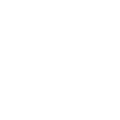
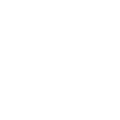
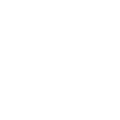
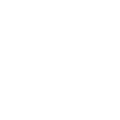
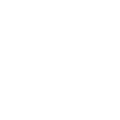
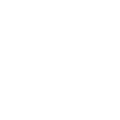
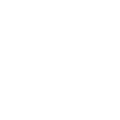
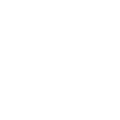
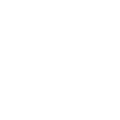
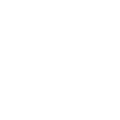
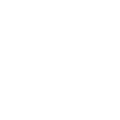

In [91]:
hasil

[{'link': 'https://www.tokopedia.com/wkcleaner/plastrim-restored-penghitam-permanent?src=topads',
  'img_link': 'https://ecs7-p.tokopedia.net/img/cache/250-square/VqbcmM/2020/12/21/44b7dc44-d74e-4e33-baba-1018686b33d7.png.webp',
  'img_alt': 'Plastrim Restored Penghitam Permanent',
  'product_name': 'Plastrim Restored Penghitam Permanent',
  'product_price': '30000',
  'n_stars': 5,
  'n_reviews': 165},
 {'link': 'https://www.tokopedia.com/mameeindonesia/mister-potato-crisps-sambal-balado-4-pcs-special-edition?src=topads',
  'img_link': 'https://ecs7-p.tokopedia.net/img/cache/250-square/VqbcmM/2020/9/9/ee6da73d-56e4-41bc-94bd-4d40e7dd5a33.jpg.webp',
  'img_alt': 'Mister Potato Crisps Sambal Balado - 4 Pcs (Special Edition)',
  'product_name': 'Mister Potato Crisps Sambal Balado - 4 Pcs (Special Edition)',
  'product_price': '63360',
  'n_stars': 5,
  'n_reviews': 1128},
 {'link': 'https://www.tokopedia.com/inito8/masker-3ply-3-ply-grade-medical-bedah-medis-surgical-mask-earloop?src=top
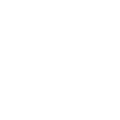
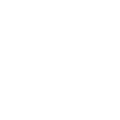
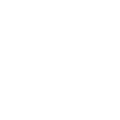
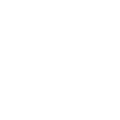
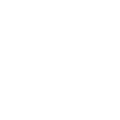
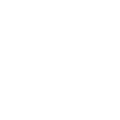
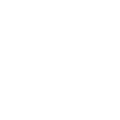
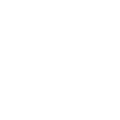
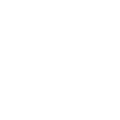
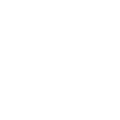

In [9]:
hasil

In [2]:
! pip install pandas xlrd openpyxl
import pandas as pd

You should consider upgrading via the '/run/media/abdul/Asus/ICU/autoMarketplace/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
df = pd.read_excel('add.xls')

/run/media/abdul/Asus/ICU/autoMarketplace/venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [4]:
df

Unnamed: 0  \
0                                      Error Message   
1  Abaikan kolom ini. Kolom ini akan berisi pesan...   
2                                                NaN   

                                    Informasi Produk  \
0                                       Nama Produk*   
1  Masukkan nama produk (maks. 70 karakter). \n\n...   
2                                        dfdfdfdfdfd   

                                          Unnamed: 2  \
0                                   Deskripsi Produk   
1  Masukkan deskripsi produk dengan lengkap dan j...   
2                                               None   

                                 Unnamed: 3  \
0                            Kategori Kode*   
1  Pilih kategori kode dari daftar kategori   
2                                      None   

                                          Unnamed: 4  \
0                                      Berat* (Gram)   
1  Masukan berat produk dengan angka tanpa menggu...   
2                                               None   

                                          Unnamed: 5  \
0                                Minimum Pemesanan *   
1  Tentukan jumlah minimum pemesanan\nJika tidak ...   
2                                               None   

                                          Unnamed: 6  \
0                                      Nomor Etalase   
1  (Opsional) Kelompokan produk dalam Etalase aga...   
2                                               None   

                                          Unnamed: 7  \
0                              Waktu Proses Preorder   
1  (Opsional) Masukkan jumlah hari PreOrder. \n\n...   
2                                               None   

                                          Unnamed: 8  \
0                                           Kondisi*   
1  Pilih salah satu kondisi produk: Baru atau Bek...   
2                                               None   

                                          Unnamed: 9  ...  \
0                                          Gambar 1*  ...   
1  Masukkan alamat website (link) foto produk\n\n...  ...   
2                                               None  ...   

                                         Unnamed: 12  \
0                                           Gambar 4   
1  Masukkan alamat website (link) foto produk\n\n...   
2                                               None   

                                         Unnamed: 13  \
0                                           Gambar 5   
1  Masukkan alamat website (link) foto produk\n\n...   
2                                               None   

                                         Unnamed: 14  \
0                                 URL Video Produk 1   
1  Tambahkan video untuk menjelaskan spesifikasi ...   
2                                               None   

                                         Unnamed: 15  \
0                                 URL Video Produk 2   
1  Tambahkan video untuk menjelaskan spesifikasi ...   
2                                               None   

                                         Unnamed: 16  \
0                                 URL Video Produk 3   
1  Tambahkan video untuk menjelaskan spesifikasi ...   
2                                               None   

                                       Informasi SKU  \
0                                           SKU Name   
1  (Opsional) Masukkan SKU maks. 50 karakter. SKU...   
2                                               None   

                                         Unnamed: 18  \
0                                            Status*   
1  Pilih status produk: Aktif atau Nonaktif\n\nJi...   
2                                               None   

                                         Unnamed: 19  \
0                                       Jumlah Stok*   
1  Isi jumlah stok yang tersedia dalam format ang...   
2                                               None   

        

In [8]:
! pip install pysqlite3 

     |████████████████████████████████| 40 kB 2.7 MB/s eta 0:00:01
  Created wheel for pysqlite3: filename=pysqlite3-0.4.5-cp39-cp39-linux_x86_64.whl size=159683 sha256=2e151773a272a4012896ac2477cbcc13606dbbc1a33ea06145d57210c801cac5
  Stored in directory: /home/abdul/.cache/pip/wheels/5e/ad/a5/37aae144cfab231adbb3cda459704b19ac4d3daeb2af8842fd
Successfully built pysqlite3
You should consider upgrading via the '/run/media/abdul/Asus/ICU/autoMarketplace/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import sqlite3

conn = sqlite3.connect('TestDB1.db')  # You can create a new database by changing the name within the quotes
c = conn.cursor() # The database will be saved in the location where your 'py' file is saved

# Create table - CLIENTS
c.execute('''CREATE TABLE CLIENTS
             ([generated_id] INTEGER PRIMARY KEY,[Client_Name] text, [Country_ID] integer, [Date] date)''')
          
# Create table - COUNTRY
c.execute('''CREATE TABLE COUNTRY
             ([generated_id] INTEGER PRIMARY KEY,[Country_ID] integer, [Country_Name] text)''')
        
# Create table - DAILY_STATUS
c.execute('''CREATE TABLE DAILY_STATUS
             ([Client_Name] text, [Country_Name] text, [Date] date)''')
                 
conn.commit()

# Note that the syntax to create new tables should only be used once in the code (unless you dropped the table/s at the end of the code). 
# The [generated_id] column is used to set an auto-increment ID for each record
# When creating a new table, you can add both the field names as well as the field formats (e.g., Text)


In [ ]:
c = conn.cursor()
c.execute('''CREATE TABLE RESULTS_SCRAPPER
             ([Client_Name] text, [Country_Name] text, [Date] date)''')
                 
conn.commit()


In [5]:
def create_db(name_db):
    conn = sqlite3.connect(name_db)  # You can create a new database by changing the name within the quotes
    curr = conn.cursor() # The database will be saved in the location where your 'py' file is saved
    curr.execute(
        """CREATE TABLE "katagori"(
                    "label_utama" Text NOT NULL,
                    "kategori" Text NOT NULL,
                    "sub_kategori" Text NOT NULL,
                    "kode" Integer );"""
    )
    
    curr.execute(
        """CREATE TABLE "template_tokped"(
                        "nama_produk" Text NOT NULL,
                        "deskripsi_produk" Text,
                        "kategori_kode" Integer NOT NULL,
                        "berat_gram" Integer NOT NULL,
                        "minimum_pesanan" Integer NOT NULL,
                        "nomor_etalase" Integer,
                        "waktu_proses_po" Integer,
                        "kondisi" Text NOT NULL,
                        "link_gambar1" Text NOT NULL,
                        "link_gambar2" Text,
                        "link_gambar3" Text,
                        "link_gambar4" Text,
                        "link_gambar5" Text,
                        "url_video1" Text,
                        "url_video2" Text,
                        "url_video3" Text,
                        "sku_name" Text,
                        "status" Text NOT NULL,
                        "jumlah_stok" Numeric NOT NULL,
                        "harga" Numeric NOT NULL,
                        "asuransi_pengiriman" Numeric,
                        "link" Text NOT NULL PRIMARY KEY,
                        CONSTRAINT "unique_link" UNIQUE ( "link" ) );"""
    )
    
    curr.execute(
        """CREATE TABLE "product_detail"(
                        "link" Text NOT NULL PRIMARY KEY,
                        "n_stars" Real,
                        "n_reviews" Integer,
                        "n_stock" Integer,
                        "n_terjual" Integer,
                        "n_discuss" Integer,
                        "tanggal" Date,
                        CONSTRAINT "lnk_template_tokped_product_detail" FOREIGN KEY ( "link" ) REFERENCES "template_tokped"( "link" )
                        );"""
    )
    
    conn.commit()
    
   

In [4]:
create_db("example.db")

In [250]:
data = hasil[6]
pprint(data)

{'Berat': 400.0,
 'Etalase': 'Anti Covid-19',
 'Kategori': 'Vacuum Cleaner Mobil',
 'Kondisi': 'Baru',
 'description': 'PENTING !!!\n'
                'Tambahkan packing extra bubble untuk keamanan produk. <a '
                'href="https://www.tokopedia.com/kikhyo/tambahan-packing-extra-bubble-khusus-kurir-next-day-dan-reguler" '
                'rel="noopener noreferrer" '
                'target="_blank">https://www.tokopedia.com/kikhyo/tambahan-packing-extra-bubble-khusus-kurir-next-day-dan-reguler</a>. '
                'Thanks\n'
                '\n'
                'Original produk\n'
                'isi :400ML (dapat selang) \n'
                'Expired : 2022\n'
                '\n'
                'AC Cleaner Spray / Pembersih AC Cleaner Spray\n'
                'Alat ini berfungsi untuk membersihkan AC mobil dari kotoran '
                'debu, menghilangkan bau tidak sedap, membersihkan jamur dan '
                'bakteri pada interior AC mobil. Segarkan kembali udara A

In [248]:
import sqlite3

def get_kode_kategori(kategori):
    sql_select_kode_ktgr = """
                            SELECT "kode"
                                FROM "katagori"
                            WHERE "sub_kategori" = '%s';
                    """

    
    conn = sqlite3.connect('referensi.db')  # You can create a new database by changing the name within the quotes
    curr = conn.cursor()
    
    data = hasil[d]
    sql = sql_select_kode_ktgr 
    curr.execute(sql % (kategori))
    
    result = curr.fetchone()
#     print(result[0][0],' %s'%(d))
    return result[0]
    #conn.commit()

import requests
import base64


def upload_img_b64(key, base64img):
    url = 'https://api.imgbb.com/1/upload'
    myobj = {'key': key,
            'image':base64img}

    x = requests.post(url, data = myobj)

    return x.json()

def upload_img(key, path):
    try:
        with open(path, "rb") as img_file:
            base64img = base64.b64encode(img_file.read())
    except Exception as err:
        raise err

    res_json = upload_img_b64(key=key, base64img=base64img) 
    #print(res_json)
    if res_json['status']==200:
        filename_ori = path.split('/')[-1]
        root = path.replace(filename_ori, '')
        path_filename_new = root + res_json['data']['image']['filename']
        os.rename(path, path_filename_new)

        return res_json['data']['url']

def mass_upload_img(key,list_img):
    list_url = []
    for i in range(5):
        try:
            url_img = upload_img(key=key, path=list_img[i])
            list_url.append(url_img)
        except:
            list_url.append('NULL')
            continue
    return list_url

class random_uid:
    def __init__(self):
        shortuuid.set_alphabet("abcdefghijklmnopqrstuvwxyz")
        self.sku = shortuuid.uuid()[:5]
    def refresh_sku(self):
        self.sku = shortuuid.uuid()[:5]
    
    def get_sku_name(self):
        uid = uuid.uuid4()
        int_uid = str(uid.int)[:10]
        
        return self.sku +'-'+ int_uid

In [260]:
sql_template_product = '''
    INSERT INTO "template_tokped" ( "asuransi_pengiriman", "berat_gram", "deskripsi_produk", 
                                    "harga", "jumlah_stok", "kategori_kode", "kondisi", 
                                    "link", "link_gambar1", "link_gambar2", "link_gambar3", 
                                    "link_gambar4", "link_gambar5", "minimum_pesanan", 
                                    "nama_produk", "nomor_etalase", 
                                    "sku_name", "status", "url_video1", "url_video2", 
                                    "url_video3", "waktu_proses_po") 
    VALUES ( '%s', '%s', '%s', '%s', '%s', 
             '%s', '%s', '%s', '%s', '%s', '%s', 
             '%s', '%s', '%s', '%s', '%s', 
             '%s', '%s', '%s', '%s', '%s', '%s'
             );
    '''

In [256]:
sql_template_product = '''
        INSERT INTO "template_tokped" ( "asuransi_pengiriman", "berat_gram", "deskripsi_produk", 
                                        "harga", "jumlah_stok", "kategori_kode", "kondisi", 
                                        "link", "link_gambar1", "link_gambar2", "link_gambar3", 
                                        "link_gambar4", "link_gambar5", "minimum_pesanan", 
                                        "nama_produk", "nomor_etalase", 
                                        "sku_name", "status", "url_video1", "url_video2", 
                                        "url_video3", "waktu_proses_po") 
      
        VALUES (%s, %s, '%s', %s, %s, 
                %s, %s, %s, %s, %s, %s, 
                %s, %s, %s, %s, %s, 
                %s, %s, %s, %s, %s, %s
                );
        '''

In [104]:
list_img = data['list_img']

In [105]:
list_link = mass_upload_img(key,list_img)
print(list_link)

{'data': {'id': 'jHr9Nzf', 'title': 'e237e14807ee', 'url_viewer': 'https://ibb.co/jHr9Nzf', 'url': 'https://i.ibb.co/fQxVg9F/e237e14807ee.png', 'display_url': 'https://i.ibb.co/fQxVg9F/e237e14807ee.png', 'size': 192900, 'time': '1612754192', 'expiration': '0', 'image': {'filename': 'e237e14807ee.png', 'name': 'e237e14807ee', 'mime': 'image/png', 'extension': 'png', 'url': 'https://i.ibb.co/fQxVg9F/e237e14807ee.png'}, 'thumb': {'filename': 'e237e14807ee.png', 'name': 'e237e14807ee', 'mime': 'image/png', 'extension': 'png', 'url': 'https://i.ibb.co/jHr9Nzf/e237e14807ee.png'}, 'delete_url': 'https://ibb.co/jHr9Nzf/1f3b80b8b8bf792102cb5ab2240b718b'}, 'success': True, 'status': 200}
{'data': {'id': 'N6h4SfV', 'title': '2e9e199a6d30', 'url_viewer': 'https://ibb.co/N6h4SfV', 'url': 'https://i.ibb.co/Z6sZmvL/2e9e199a6d30.png', 'display_url': 'https://i.ibb.co/Z6sZmvL/2e9e199a6d30.png', 'size': 240654, 'time': '1612754194', 'expiration': '0', 'image': {'filename': '2e9e199a6d30.png', 'name': '2

In [109]:
list_link

['https://i.ibb.co/fQxVg9F/e237e14807ee.png',
 'https://i.ibb.co/Z6sZmvL/2e9e199a6d30.png',
 'https://i.ibb.co/LSDfV2W/c5178d86eb03.png',
 'https://i.ibb.co/x8NMgLv/e2389d95de24.png',
 'https://i.ibb.co/44RVpXn/6cc007bf15d2.png']

In [84]:
url_img = upload_img(key='dd', path=list_img[2])
print(url_img)

{'status_code': 400, 'error': {'message': 'Invalid API v1 key.', 'code': 100, 'context': 'Exception'}, 'status_txt': 'Bad Request'}
'status'
None


In [252]:
random_uid = random_uid()


In [261]:
value = (
    'opsional', data['Berat'], data['description'],
    data['product_price'], data['n_stock'], get_kode_kategori(data['Kategori']), data['Kondisi'],
    data['link'],list_link[0], list_link[1], list_link[2], list_link[3], list_link[4],
    1 , data['product_name'], 'NULL', random_uid.get_sku_name(), 'Aktif', 'NULL','NULL','NULL','Tidak'
)

In [262]:
print(sql_template_product % value)


    INSERT INTO "template_tokped" ( "asuransi_pengiriman", "berat_gram", "deskripsi_produk", 
                                    "harga", "jumlah_stok", "kategori_kode", "kondisi", 
                                    "link", "link_gambar1", "link_gambar2", "link_gambar3", 
                                    "link_gambar4", "link_gambar5", "minimum_pesanan", 
                                    "nama_produk", "nomor_etalase", 
                                    "sku_name", "status", "url_video1", "url_video2", 
                                    "url_video3", "waktu_proses_po") 
    VALUES ( 'opsional', '400.0', 'PENTING !!!
Tambahkan packing extra bubble untuk keamanan produk. <a href="https://www.tokopedia.com/kikhyo/tambahan-packing-extra-bubble-khusus-kurir-next-day-dan-reguler" rel="noopener noreferrer" target="_blank">https://www.tokopedia.com/kikhyo/tambahan-packing-extra-bubble-khusus-kurir-next-day-dan-reguler</a>. Thanks

Original produk
isi :400ML (dapat selang) 
Expire

In [263]:
conn = sqlite3.connect('TestDB.db')  # You can create a new database by changing the name within the quotes
curr = conn.cursor()
sql = sql_template_product % value
curr.execute(sql)

conn.commit()

In [66]:
import sqlite3

conn = sqlite3.connect('db/09-02-2021.db')  # You can create a new database by changing the name within the quotes
curr = conn.cursor()
sql = '''
SELECT
    "nama_produk",
    "deskripsi_produk",
    "kategori_kode",
    "berat_gram",
    "minimum_pesanan",
    "nomor_etalase",
    "waktu_proses_po",
    "kondisi",
    "link_gambar1",
    "link_gambar2",
    "link_gambar3",
    "link_gambar4",
    "link_gambar5",
    "url_video1",
    "url_video2",
    "url_video3",
    "sku_name",
    "status",
    "jumlah_stok",
    "harga",
    "asuransi_pengiriman"
FROM "template_tokped";
'''
curr.execute(sql)
hasil = curr.fetchall()


In [56]:
for dt in hasil:
    print(len(dt))

21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21


In [57]:
hasil[0]

('Saniter Fabric Disinfectant 200+30ml - 2pcs',
 'KHUSUS UNTUK PEMESANAN DENGAN MENGGUNAKAN GOJEK/GRAB YANG MASUK SETELAH PUKUL 13.00 WIB BERPOTENSI DIKIRIMKAN KEESOKAN HARINYA.\n\nNOTE:\n1. Instant Delivery : Kurir akan melakukan penjemputan barang dengan estimasi waktu maksimal 1 (satu) jam setelah Penjual melakukan Request Pick Up dan barang akan diterima pembeli 3 (tiga) jam SETELAH penjual menyerahkan barang kepada kurir pengiriman.\n\n2. Same Day Delivery:  batas waktu driver akan datang untuk mengambil barang setelah Request Pick Up adalah maksimal 3 jam, dan barang akan diterima pembeli 8 jam SETELAH penjual menyerahkan barang kepada kurir pengiriman.\n\n-------\n\nSaniter Fabric Disinfectant Spray merupakan salah satu cara dalam mencegah penularan kuman karena mampu merusak lapisan lemak dari kuman tersebut. Kuman dapat ditemukan pada peralatan yang sering kita gunakan sehari-hari seperti sofa, remote control, karpet, gorden, sepatu, tas, kursi, mobil, pakaian, dll.\n\nSaniter

In [18]:
get_kode_kategori(kategori=data['Kategori'])

3771

In [1]:
base64img = 'iVBORw0KGgoAAAANSUhEUgAABSoAAAKZCAIAAAAwN4K8AAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nO3dd5wU9f3A4dm9o4liQRFQUIqCiICKvWPBrlgjlhg7UWOJJbYYS+waS2JX1MQoUVF/Noq9othApStFuqDUa1z5/XFU2XIefFSS53n5B97e7ZT97sy8d2dnUwkAAACwAjbvslXe30n/DPMBAAAA/+PkNwAAAIST3wAAABDux/ld2OGCdya+fGrL/44sr9v9gelFL5+0birzzavtdMtXXz+4/9pZbs6rsOt1w4o+vLhdQa1nMEnqHfr4nOKXTlyntvOwykq3OvedopE3bltYmz9eZs3XO6D3zKL/O2GtlTt//Bco7HrdsAVVVVVVVeUT7tq9TqZfWaFxGGqVnvna+W9a5JWxd6jtdPOsw9pZ+Ws+3fLsZ+/bv+5Ku7+fKM/hwa/AypjDGo7DsGEDwPKWzexU06OvuXDdJ67554TKX2h+flZF7992y7BDrj9/q1/sACCvut3unlQ08PSmv+gRQmGTHXvd+eKnE34oKpk/fVi/245u12DF77Rq7rBX/vXsxzOqfnzDz7DIdbvdPbFkuSOS+of8a1bJq72ap5KkYYdjbnr+kwk/FJfMmzHhy7f6XHfoxjV6QarOhntd1PvN4VPnlhTPmjzs9YdP7rRoaKUab9frngFfTplbUjx7yvDXr9un+kWf1Fpbn3hTn3eGTfy+qHT+d6PfeeyiPZsvnqv0xj2ue7zfh6NnFFdUTH+g+1KjtO5e90yuqFpG6Vt/yP+iWZ7lWv2gR6YVl8x7/8JNll0z6SY7nXXvgC8mzS4u+n7CkFfuOm2b6peLajsbNVRvuxuGzf/kii1qf7xf/vGlHeqk0k1PH1CW7VeyjsMVtErP/C/lf3CRV7oarMOscm57Q9Z8Op3+GfZtv4rd6K/bigybHKx5gEyWOTgs6HDK+d3HP9r1o5JfanZ+ZlWTn77/5eseOHf/W45/bvYvPTO/UukWRzz02p2bDrji3G4nDP62ovke5z3Q+4WbZmx99mtzV+h+q2YMuO60AStpJn+i8tHDx1T1aN2yIBlZsfiH6aatWtab+eXIGUnjQ+4e0Hu3z649/8ATh81dfYPNtj9wn1brFSTj8rwmlWpyyL1v9Tl46n2XHP/HQdPrteiyT8+2GxYmQ8uSpG6ni57vf0nD5645++B3J5Q1atlh3dnVB7HpDXc/uNOs/refd+2wCUXr7XbOzVe/8GKDnba76rMFSZKkVmtUZ/oHj1/74rBLbjtguclVjH34+CPvGrZoASrnTZySewZT+Zar4W499p7e++4JRx96cKtbbx2z8MepNfe4+bUXT6noc/lpV7wxvnyd1l3367bVhgWDvy+v3WzUVKrpUX86pfELve75snyl3F8WMeNwlZ75X7X/wUX+lViZa75wg70vuvnqU/bdsmXDsgl7jx/5/t1nn3DPkNDnCgD8Km15zZfFn17ecal3vtKtzn17/vi/d6u/+Actz3pj/rf37l399mdq9S2Ov/3lLybPKSmZM/HTZ67cb8OFOV+3+wPTiwdec/rfBnw58ft5s8e+ccuBG6Tz3mFq7Z3Pfbj/p2Onzy0pmT1xyIu39eyw2pJ5STU9fWDRpPuOO+CKpz+dOKekeNaEdy5bdCJcQbPdz3/4jRFT55UUfT/+k+evP7j6Hbi63R+YXtTv4iMu7zt02vySpWZjiTUOe3zmD08dvVZNX52t3+6Yu14f80Nx0Yxh/3fVhQ+MWOq0rqxrI0nS63e75MmPxv9QUlr0w6Rhbz126uI3xZY++bxu2+MeHz3z87sObF6QpJqc0q9k2TcWq0peOXm91KI73OPif384blZJ6bxpw/rdvmRF1Tv4n7NL3rjziicHfz1p+oyJn/a5cOfGqbw3LXuSW8GmFw0qGnH9NoVJkmra8+lJX9y665pL1k+6zfnvTnu8R8MkSZJ6bY+6/bXR3xcVzRj+f3/54/1Lr43sj1dh56uGVp/mtmCZUxnzLHLWNV/vgN4zi/tfe+a9746fUzx/6pBnLtujSZ43YOvufd+U4v6nNkmlW5//bmnF1Pv3qZfU2fWO8cVvnt0iXe+AR74veePMDX/im7h1t79pZNm0J45cb/mhtOZhj0+f+fxvm+e7x9Q6J/xfUdnHl262zJvPBZtd+nHp8u9+lw67rutPems133Kttv9Dk8b8bddWvV6d/c55rRf9VkGHSweXzhnYK9Pb//lno06jJhts0Hyd+ll/Iau6W187dP6Qq7Zcchpk1idR7u1GkqTWP61/0fJnVGYbhzk2X/mn9V8w85lk2cAm2Z/mWaZVZ4dbxswfcHqzZZ8kdXa7a8LcF09cuP1ZmYucexuVTY4VlXNaOfYOK3latRk2qWYnvzxnxpNHLv60VWrtI56cMbf/6Rukc297s6/5JMkxNrKO+XSrM1+bPaHP7zp2PLfvfYesu0GXA08+aLO8J+ln3X/VdrlyHh5k3cPmHAA5ZD8GyL4Oc85hjuONrOMw645+0X1mfurlmlYWWdd8TbYAmdVmAOSZS4AAm3fZKu9/y2yedtm17eyPPxq15A3BpHL8M08OanzIUbssPNs4vdFhR207/dkn3i5OkiTd+uQ+r97adeRNR2+3Wfsdfvto1YlPPnNRp8Ub7rq7HrvbkD9s12K9lgc9vfaZ9/55rwb57jDVsFmTeQNvOnn/ru3abdfz7lkHPvTyrXs3XHoOU2v1uOqCxk+duNX6jdbr+Js7Bs+qSpIkWWPXGwa+fPlmQ68/cpt27bc74toPGrZacgZv3R3POn3NJ07ZbZu9Lxnc6g8LZ2OJ+Z98+GX9nXbvWrMPO9Xf4epnex9V3vs3W3fY8YxXO/Y6oe2Sws6xNlbf/8Z/X9Huw/P3aLfxptsedE7vr4qXP9ZosNkpT7x6e9u+R+19zouTK5Kq6Q/uWz+VqrfnPZOLXz2jWTqVSqXq7/fQd1VJkiQFm5z15HOXtRt8yV4dNt32uN4Ljuj90m37LCnkursc1ql/z44brN/qgH+tfdEzDxzbLF2DmzJJtzrmjJ0HXX/9O7OTtbf/wyNvDxs75tPne208p6LZhuukk3rb/rnvo8dUPtZzmw47nPJK+9OPa/3jxcr4eJUPubJTnVRB6/PeXbDML+dc5BxrPkmSpG633/ecd9shnTff5Zx3Wv3p6UdOyn0GdPmY4WOqWrZqWdigc9fNimYXdunaurDhRq3WnT1yxLTKyu9nfJ9qu0u3Vj/pFPvCDvvv12r+q/95+bvlTs6ss2W3XRt++EHJqU9/Mn76d5OGv9n73J3WzTR/qdXWWD1dOnnSjJDPfuRZrtV27dE9eaP/4AkD+33VpcfBG1XPYLrlPvt1qvrgqb7jazNPhZudN2DctyPu2rfeT/zD1HqHXXxas343/uPzxWMk+5Mo/3Yjo2zjsFrGzVfNprVKz3wmOTewSeaneZZpLRj63oclXbbbcpkBUbDxtl0bj3hv0A85z2uu1SLn30ZlkmdFZZlWnm3USp1WbR7Kqql9H36par8TDmmy8GWO9Q46ft9Uv95PT67Mue3Nueazj43sY76w/Vad6nz6wjPD51QkVQvmTPr8xYdeGF6x3F1nkHH/VevlSrIeHuTbw2Z+UHLJdQxQmwOYHMcbtRuHOeQ50sso65pfgS1A8tMHwAotN8DP464JJZ9evvmyhyepZqe8MmfSA/uuliRJUtD2gveLRt+yY90kSZI6O946pvi989ss6oj0Rue8XbTwrbC63R+YXjrkL52qN/uFna8aWvTJZR0Kct/hj6Tb/PH9ohE3LH6xPdX09IElC764ZssfbfZTTU58Ye68V3+fIbjqdn9getnIm7av/ovCba4fXrxoNharf+jjs0sGnFajDyfV637/lNJPLlu4itIb/v614rKFryvnWhvpDX7/evGMJ47I9BZ7vUMfn1P88lndznlp4rS3/7zTjy8Dl/GjUwVb/Pnzkgl377n4JYw/vFUy+z9HNUqS6leIy766dquFa63+PvdNLnrt9xumc9+U7UXxRr95ZubAM5qlUk2O7jN53HPndeuw6dZH3fHx3JK3z9k4XW+veyeXfHzpwvWZanbagKKyH737nenxWrSCsl3IJ+Mi51jzSb0Des9cMO7O3Rfuzxse2HtayVKPREb19nto+uwnDmvU9bovPr/rlhemPXNM405//mz+O+e2SidJuum+N74zpbTsh68HvfTYbRcft3OLGrx7W++gx2aVDfvr1hmOdFY/pm9x2Q/Tv3r2wv233rzLXr9/fGTJ9y+fstGPZzDV5KCHvp7/5c27rL7sz7O8+73sh67LR9+8Q76XkHIuV4N97p8444nDGyVJYee/DJn31h+q56/OrneMWzBt4cQbHfvsvPLy8vLSb27ftU5NZqOw05WfL6ic8/ihS4610uvtfN4jb4+cOmvm2EF9/nrizhuv0WDttnuefe2pnZdac3U6X/np/C+v22apRc71JFp2KX+03cj+lk71r2cYhzk2X/mmtarPfAY5NrBJ3qf5ctNKb9Dr1XlDrupcmBR0+N0/Hv3THo2SpNFvnp41/s7dFl8nYeUtcp5tVM0ss6JyTCvHNmplTyvXX1UvauZ1uNre93477/WzNkonSZJu0Wvg3EkP7rfU5ibnJ3UzrfkcYyPHmE817fnUtHnDnrzknPveeuTQ1Ze7PbMc+6/aLVf2w4Nce9gaPyg1Xhu1OYDJcbyRaxzW6t3vXMc2+WRY8zXYAmS2AgMA4Gf0k9/9rl8vKSv70evbVVP/78k3Gx541B4Nk6Sg7eFHdhn/dJ+PypIkSTfpsmWL+jveOmbR8XfFuNt3qd+0+fqLdkSVk7+dUv2KdlXx/KJktdUbpnLeYZIk6fV2OOP2vu8MHTNh0pQpk9+/Yqu6qzdafelZrJrz8aBhP5rDwvZbdqoz6s23JmV+pbNi7Khvqj9TVjX7h9lVi2Zjscqy0gVJvfr1apDf6Sabbrp20ZdDx1QvVuW0oUMXLmHutVE55cUH+84+5NEvB7/02J1Xn3fM9s2X3c3U3fnavjd3b1I89osxs2pyXZvCtu3bJCM+/2rhR/QrJw8dOr3eJu1aLlrzFd+MHrvwY3QLvhk9PtW2fZsa3JRpgddt3mTBxG+/r2qwy6F7Tbz3T3e+PmzUJ/+59JrnZlUlSbpJ+3brFH055OuFD/KMr76Y8uN3MDI9XrWRY81XKx/5xbCFg6h4+Bdjkjbt2yw60bH1ee8UlZeXl5eXl029f1HDLhg9fEzBRm226LrVWp8O+Ne7X3fcpnPrVhvOHzVycmWSVE7td/EurTba5ugr/vXR7BaH3zRw2Id/22fRefpZ7jCXVDqdFBZ8cMOpt7z8yVefv3rPWVe/XNjtuIOXOTMutdaOVzzz8D5Dzzn8snfm1WidVIx9+NiuWy6y9cF/G7JoRWebw1zL1WDnw/Zv9EG/t+cmSfmw/gOmbN3joKXOUq+qHpbzXjxn260OvXNYVcGS6yVln40kScqHXtWlTrrRsc+VLl7ONffquduUx/545L49znt0/GbnPz969vyZQx8+sHTUt4sf0FTjgy/utdGrN9/18VJXAcr1JMq73aiFLJuvvNNadWc+27DJs4FNsjzNs0yrctqgD8a13rbrOoWbHtLruMN6Hb/LanU6bbdV1UfvfbZC13zKuMj5tlFZn8u5H5Qs08q9jVqZ08r7V9kUvdn73xO3P/6YTQuSgtZHHbfj1Cd7v16zzU1mOcZGjjFfNfWJk/b43X/K9jr10G1PeGbaxEH/vGC3fJ8XqpZt/1Xr5cp8eJBvD5vtQckux9qozQFMjuONvPvKnyrvkd5PtEJbgJU+AAB+Ecvs86bPSNZa58cvz1Z99+ITr9Y74Kg91yhsf+RRnb5+qs9n1Zu/VCqpmtn7gPqppaTXOfGlRUfaVVVVS7dkKu8dptuc2affdduOu/f3B+2yzZZbbtn9hsEL0qll5rCqpLh4uUBNpZIke7VWVVYuvVtbbjfZYO11VquY8d33NTpNqaoqKS8vXzyx8vIlyZBrbVRO+Pexm7fZ+ZS/9Rtbt+vp977zWZ/fLv1Sd9WcNy7cca+bvz/invt/u/HK+J6agoKCRctZUFiQqtFNyzxWqdTCY7x0Op1OJ0mSSqdKS0oXnopYWlpew6vfZny8aiX7ms/6+9Uqv33k2C07duzYsWPHLXb+86KzJysnjhhd3KLdQdu1/2rQ4OGDPinYqvsOrRt8PXz04qv/lEwdMuDff7/q7CO33/qM11uccckxLdK57jCpmDh+YtJs4xYZTrMunTljbvm0UaMXXm6tat748TNSTZouOeBMrbPLX158/pTvr9i354MjaxohVSXTRg35fJEhwycXLbolyxzmWq76O/Y4oOnq+93/bXFJScncN85ptdr2PQ7cIJ0kFd+O+7ayUYsWa6aSJKmcPWHYV6OnFddsNjLP9az/nN3jkgdffGfQ28/dc9FhnZqtt+GGjdfeuPs1b32/6BEr7HD6nw6Z9fCNfaYsM3SyPolqsN2ohcybr7zTWoVnPuuwyb2BTTI+zbNPq3z4e4Pmdd5+64277V5x/60fbr33dm222abJF+9+uGJHy9l2NzllWeR8D0qWaeXeRq3UadV62Cz4+NHHvtriuGM71+/Q87gtR/3zkUGl+f8ohxxjI9der2rusKf+csLe+1/b75+n7nne+5tc/tyjJ9foGxOy7b9qu1z5Dg+y/NVPH2w51kZtDmByHW/kHocZd/Q55TvS+6lWaAuwsgcAwC9imT3ep0OLW2zevtGP+3vmK0/2T+9/9H47HHnkZsP79PmiulAqp33++aQ1dtxjq598WaUsd5g03K7b9hUvXH/p4+8OHz956tQf1mnRsianN5UP/3Togna77pL3wlYZFW7asX1qxGdDc0dDtcrpo0b9sHrrNutXTym1epu2TRc1Wd61UTLls36P33XlGQfscOZLDbsfvONSF8pZMOT5Zz558+oTrx6z+996/6HD0u+nVlVWVKQK69RZ5jGp+Hrk10n7LpsvnFa6+RZbNCkbs+TtwzodunRceCcNN+/Upurrkd/kuamqaH5x0mC1BgvPSWu6QfVyVU6bMLmgVetm6eJ3X3iz9W/P2bt5nfQaW5xy5oGN00lSOX3EyJmrdeyy8O3z1LodOjZbGa8dZFrkHGu+WmG7LRattwbtt2hbNXrEmEUhveCHCSNHjBgxYsSIkWOmzl908LFg9PCxjbsdttPsjz+eUTrkgyHtDuvRtnjUyInLV33lzHHj56bWXHvx8yLzHZYP69d/fMM9j9q38XIHNOVffDK0vEmb1mssvKXhhi0aV02f+l31UVV6vT1v7PfsCVMu3vvoe78q/vHf1krmOcyxXPV26HHguh9fs2eXhbqe9tTc7Q87sHk6qZwwoP+X6R16HJj7IgHZ1Fmr+UYbtVx3qcFeVVGx9AyVzZo8+YfSpX6SWuuAi85s+9YtdwzK8P0LGZ9E+bcbZaVlS0b3CskzrVV65rMNm1ptYHNMq/Tjdz9p2LX7KXs3fuOp+178ZsdDT9y5w8QPBk1cEhkrbZHzbqMyL3Kt9kR5t1ErcVorMGwqRvzrkQ82Oubks07uucnHj/7rq2XTLNPuJpd8YyPHXm/hFIunfvr0dQ98UH/bHbeowfVXsu/aVupy5dvD1lLmtVGb51eO442c4zDLjn6JDMOm9kd6SZY1n38LkGHHsfDntRsAAL8yy2x833zh9dJt99x5uQu4zOr/5CuVB/z5HydsMvTJ/4xYtFlbMOgfN77e+MxHHz1//y6tN2rbZdceZ97y5FV71+Q7tDPfYfHXo75tsHW37ddJJ0mdpnteeU3PGu2QqqY/c/N943a+9slbjtupXcsN23TZt9fVp9bwUmpJQes99mj59Ssvj6zRxrr07Uce+2abMy7ae/3CJL3OThecs8/ik85yrY10i8OvvOHMQ3bcvFXz5pvuevxhWxWM/nLkcsfnpUNv/d0lH3W65tHLtlmy06kYN2ZcssV+h3Zct2H9+vXqVK+P8q+eeOTDtY6/6abfbN16o832Ov/vF+84rc/D/ecs+qP0Bsf99a89Om/ceuueN/3lkKr+jzy3+Ly2LDeVDx/8WdmWPY5o3yBJNexw8rmHL4yt+e+9+nGHHgdvlJr67zOO/U/za98dO+6jf3Sd9umEuaWVSek7Dz8yavM/3H7JPu023Hjbk28+d8f0yninO+Mi51jz1cvV/Nhrrz2088attjzqhmuOKHj14afzXCqsYsKIUWUbt1nns0HDy5O5gweN32iT9cYOH70gSZLCbS59ru+t5x6z385bdti8a/fT77r1hPW/GTBwdJ4hUvrBLZf0KTn8nuduO2nPrTbvtMO+v73y0av3Xy1JksrJfR94oXj/q/7Ra/fNWm26w4m3XL5/xZv/fmFiZZKk1tvn1gHPnlLx0AU3f9qgfZcuXbp06bz5hqsvXLbCdVp36tKlc/tmDVKFjdt07tKlc7umiy/yk6q//qaduyzWebPmec6AzL5c9XY47MAmo/o9897w6jwYMbRv37cW7NDjgGbppGLYP/5035Rut/S989R9tu6w2ZbdD9+9ZXrJyQW5Z6Nws3NeHjP2yzv2qfGl1wranfqnw4seveHxiT96/LI/ifJuN6rmfDZ45Br7nPS7bTZu1nT9tRuswHvLuae1Ss98VrXawOaYVtUPH743qv1Jp2/6Xv/Pp73Wf9Yxvfaq+Oi9L5Z869RKXOTabaNqt6LybaNW5rRWYNhUfvuf3q82PuWvvTZ4+7E+Y5cdqBm3vbnkGBs59np1drngvr+c0K3Txo3rFxQ0aL7DKb/pWjL4gy9q8CmlHLu2lblc+fawP12OtVGr51eO441c4zDbjn6RjMNmBY70Mq/5vFuA7DuOWg4AgF+11bvfN37ak0eus9xRQ8P9HpxcUVmy1PcRJUmSJKnVtzj2luc/nTCrpHT+zAlfvPH49YdvUqMrfGS+w9Sa2579r8ETpk8ZN2b44Of+etI1rxdPvmevxRfkaXr6wKJJd3fLtNUvaLbHHx9+Y8S0+aXFP0z47IUbD9loyfd25JqNwo5XfDr77XNzX6ZrGfXb9/z7G2OmTps4dtjrd9/UZ0zxMl88lnltpNbb5y993xs+8fuisrK5k4e+dOtv2i+OqKW/eCxJ0i2O7zulePgdey7+CEBqrR0vfObzyfMWVFYu/S1cBc32vLTP4AmzS8rmTx/x6t9/u8Wi10zqHfzP2cWvXHP2wx9NnFcyf8rnT/1pt0V/k+OmJKnb7oSHB0+e/cOkUYOfvfasvw0uXvjFY2t2v/frSc+d1Drz0UC9TY6+4/WvZ5UUzxj23OXn3juy6P0L2i77jUTLPV6pdU96+cdfSFL22Z+3WPKmVJZFzrrmF37x2Fn3f/Dt3JL5U4c8c+nuNfggYcHml31SVvLqGc1TycILjM16/NAGSZIk6fV3P+/u5weNnDRzflnZ/O/GvN/nqoNb16wf626076WPvT1q+ryS4tmTv3rtwZMWvaOTWmubXg++NXpGUVnJrHGDHr9w0Ucd6+x25/jyZVdGxeIxv/x3tyz44uouhUmma55VlX9z2065D9myLle9Xe8YWzb29l2W+vNU01P7Fc3vd2r118MUNNvt/AdfHzZ1bmnpvKnDX3vw3N2aVl8aKt9sZLj0Wm6N9n/w21kDz1jusnQ5n0S5txtJkiSpRtue9/QX35VUVFaVLLwOUK5xmGO7kWtaq/TM55ZlA5tk3yznmlbd3e6asGDqQ/utliTp1ue9W1o84LRlv4do5S1y7m1UNjlmPue0cuwdVvK0ajVsFml0yGPTyn94pufyJ+pk2vbm22JnGRs5xnxB60OufnTgZ99Mm1tWUVk2d+InT12+V/4zp3Luv2qxXLkfyqx72LwHFRnlOgbIvg5zTivr8UbOcZhlR79kRjMOmxzTyrfgGffm+bYAGXccKzIAAH4+Nbn02o/+JN3mrNemvXfBT7xa66oqteb+D40b9fc91/ilZ2QlqnfwP2cXPdsz00U/c9yUQ6rRdhe/NnH8wBt/u8sm6zaoU3eN5m02WCPT3q3BAb2nz3nmmDVrM9eQJElB2/Penvv137vV4Luwfn1W6Zn/H2EblSRJkm5xxoC5Ux456Bff76Vbnv38AwfW9KW5vPuvX81yEcIAAFYNP/nK50lS+fX9vU5/trjF+it67Z9VQv2Wa4y85sQrX5/7S8/Ir1nVnA9v3G+7E56td8iNLw6dPGvWxMFPXbBTo+rbClrtd0rP3do1adhgzVZ7XXzhweUv/HvgCpygx/+21NpN5w+4rNcNb87/peekFlbpmf8vZhu1tLprrLtB52P/euGuk/5574Bfw36vsrJyZXxi6Ve3XPy8DAAAfkEr/d3vXAo2PemxD8dMm1NSVjzz67cfOnPbvN9rDPDzsY1ayuo9ny2uKJ05rO8ft1tzlVsNOfZfq/RyUUMGALBqqMm73zZVAADUWGHnE6//XZdMFxypmPjyLbcNmOLyZ8D/pOU/2r08+Q0AAAArpCb5/T/xGW8AAAD4ZclvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAP2oGNUAAA8USURBVAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHCFv/QMAAAAwH+JwoKC3ffYbYuOm5eVlH0zbuzAga+VV1RU31Twy84ZAAAArOqaNG1W/Y/ddttl265bFxYU1KtXt+n66xcUFowbN776JiefAwAAwMqxWfv2S/9vp44dF/9bfgMAAMDK0ajRGkv/b4PVGiz+t/wGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAACCc/AYAAIBw8hsAAADCyW8AAAAIJ78BAAAgnPwGAACAcPIbAAAAwslvAAAACCe/AQAAIJz8BgAAgHDyGwAAAMLJbwAAAAgnvwEAAGDlKC4qXvp/588vWvxv+Q0AAAArx9Avv1z6fz8fMnTxvwt+9pkBAACA/ypNmjar/sfEbycWFBasucaaFZUVQ7748s033178O6lfaN4AAADgv8TmXbbK+ztOPgcAAIBw8hsAAADC/T8h8x/HYlOUfgAAAABJRU5ErkJggg=='

In [148]:
import uuid, shortuuid
uid = uuid.uuid4()
str(uid.int)[:5]

'30374'

In [206]:
random_uid = random_uid()

In [228]:
random_uid.get_sku_name()

'aercd-1398773411'

In [197]:
shortuuid.set_alphabet("abcdefghijklmnopqrstuvwxyz")
shortuuid.uuid()

'aeytdkqtjcejpfkyxilqoycuimfp'

In [143]:
sku_name = data['Kategori']
for trash in ['a','i','u','e','o', ' ','&']:
    sku_name = sku_name.replace(trash, '')
print(sku_name)

MskrKshtn


In [9]:
upload_img(key, base64img)

{'data': {'id': 'XFLhzbJ',
  'title': '7521048d7317',
  'url_viewer': 'https://ibb.co/XFLhzbJ',
  'url': 'https://i.ibb.co/HG4WrVg/7521048d7317.png',
  'display_url': 'https://i.ibb.co/QYQ26fm/7521048d7317.png',
  'size': 12139,
  'time': '1612691365',
  'expiration': '0',
  'image': {'filename': '7521048d7317.png',
   'name': '7521048d7317',
   'mime': 'image/png',
   'extension': 'png',
   'url': 'https://i.ibb.co/HG4WrVg/7521048d7317.png'},
  'thumb': {'filename': '7521048d7317.png',
   'name': '7521048d7317',
   'mime': 'image/png',
   'extension': 'png',
   'url': 'https://i.ibb.co/XFLhzbJ/7521048d7317.png'},
  'medium': {'filename': '7521048d7317.png',
   'name': '7521048d7317',
   'mime': 'image/png',
   'extension': 'png',
   'url': 'https://i.ibb.co/QYQ26fm/7521048d7317.png'},
  'delete_url': 'https://ibb.co/XFLhzbJ/f2614841548adfa00aab652e70b2874e'},
 'success': True,
 'status': 200}

In [3]:
! pip install xlsxwriter


     |████████████████████████████████| 144 kB 2.1 MB/s eta 0:00:01
You should consider upgrading via the '/run/media/abdul/Asus/ICU/autoMarketplace/venv/bin/python -m pip install --upgrade pip' command.


In [60]:
import xlsxwriter

workbook = xlsxwriter.Workbook('./example/template.xlsx')


In [67]:
import openpyxl
wb = openpyxl.load_workbook('./example/template_tokped.xlsx')


In [68]:
wb.sheetnames

['ISI Template Impor Produk',
 'Daftar Kategori',
 'Daftar Etalase',
 'Contoh Pengisian Template Impor']

In [69]:
ws=wb.get_sheet_by_name('ISI Template Impor Produk')

<ipython-input-69-67dff3b5dcd8>:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  ws=wb.get_sheet_by_name('ISI Template Impor Produk')


In [70]:
i = 0
for data in tqdm(hasil):
    j = 0
    for a_cell in data:
        if a_cell != 'NULL':
            ws.cell(row=4 + i , column=2 + j, value=a_cell)
        j = j +1
    i = i + 1

100%|██████████| 31/31 [00:00<00:00, 2135.21it/s]


In [28]:
ws.cell(row=4, column=2, value=10)

<Cell 'ISI Template Impor Produk'.B4>

In [71]:
wb.save(filename = 'result.xlsx')